#IMPORT Libery

In [38]:
# to install dependencies with anaconda installed
! conda install pandas numpy pandas-datareader seaborn matplotlib
# else
! pip install pandas numpy pandas-datareader seaborn matplotlib

# load packages
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import seaborn as sns
from matplotlib import pyplot as plt
# not needed, only to prettify the plots.
import matplotlib
from IPython.display import set_matplotlib_formats
%matplotlib inline

/bin/bash: conda: command not found


In [0]:
def plot_this(df, title, figsize=None, ylabel='',
             output_file='imgs/fig.png', bottom_adj=0.25,
             txt_ymin=-0.4, bar=False):
    if bar:
        ax = df.plot.bar(title=title, figsize=figsize)
    else:
        ax = df.plot(title=title, figsize=figsize)
    sns.despine()
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.text(0, txt_ymin, asset_info, transform=ax.transAxes, fontsize=9)
    plt.gcf().subplots_adjust(bottom=bottom_adj)
    plt.savefig(output_file, **kw_save)

In [0]:
# prettify the figures
plt.style.use(['seaborn-white', 'seaborn-paper'])
matplotlib.rc('font', family='Times New Roman', size=15)
set_matplotlib_formats('png', 'png', quality=90)
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'cm'
plt.rcParams['axes.grid'] = True

kw_save = dict(bbox_iches='tight', transparent=True)

asset_info = '''
BTC/USD
'''

ดึงข้อมูล

In [0]:
from pandas_datareader import data as pdr

import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)

In [42]:
# ===========
today = '2020-01-20'  # to make static this script.
tckr = 'BTC-USD'  
# download data
data = pdr.get_data_yahoo(tckr, "2010-01-01", today)
# add frequency needed for some pandas functionalities releated with offsets
data = data.asfreq('B')  
data.columns = data.columns.map(lambda col: col.lower())

[*********************100%***********************]  1 of 1 downloaded


ตรวจสอบข้อมูล

In [43]:
data.head(20)  # first values

,open,high,low,close,adj close,volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800
2014-09-29,376.928009,385.210999,372.239990,375.467010,375.467010,32497700


FileNotFoundError: ignored

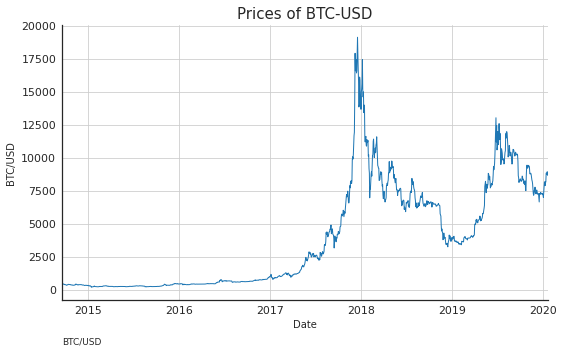

In [45]:
# using close prices
prices = data.close.copy()
# we convert to DataFrame to make easy store more series.
results_storage = prices.to_frame().copy()
# plotting
plot_this(prices, title='Prices of %s' % tckr, ylabel='BTC/USD ',
          txt_ymin=-0.2, bottom_adj=0.15, output_file='imgs/fig_prices.png',)

In [46]:
# extract some date information
results_storage['year'] = prices.index.year
results_storage['month'] = prices.index.month
results_storage['day'] = prices.index.day
results_storage['week_day'] = prices.index.dayofweek
results_storage['week_day_name'] = prices.index.strftime('%A')
results_storage.tail(10)

,close,year,month,day,week_day,week_day_name
Date,,,,,,
2020-01-07,8163.692383,2020,1,7,1,Tuesday
2020-01-08,8079.862793,2020,1,8,2,Wednesday
2020-01-09,7879.071289,2020,1,9,3,Thursday
2020-01-10,8166.554199,2020,1,10,4,Friday
2020-01-13,8144.194336,2020,1,13,0,Monday
2020-01-14,8827.764648,2020,1,14,1,Tuesday
2020-01-15,8807.010742,2020,1,15,2,Wednesday
2020-01-16,8723.786133,2020,1,16,3,Thursday
2020-01-17,8929.038086,2020,1,17,4,Friday


#Trailing Returns

##Approach 1: starting from prices

In [0]:
def total_return(prices):
    """Retuns the return between the first and last value of the DataFrame.

    Parameters
    ----------
    prices : pandas.Series or pandas.DataFrame

    Returns
    -------
    total_return : float or pandas.Series
        Depending on the input passed returns a float or a pandas.Series.
    """
    return prices.iloc[-1] / prices.iloc[0] - 1

In [48]:
approach1 = results_storage.groupby(['year', 'month'], )['close'].apply(total_return)
approach1.tail(12)

year  month
2019  2        0.105174
      3        0.061870
      4        0.286794
      5        0.587078
      6        0.511431
      7       -0.047009
      8       -0.077069
      9       -0.198409
      10       0.102635
      11      -0.161953
      12      -0.017535
2020  1        0.202421
Name: close, dtype: float64

FileNotFoundError: ignored

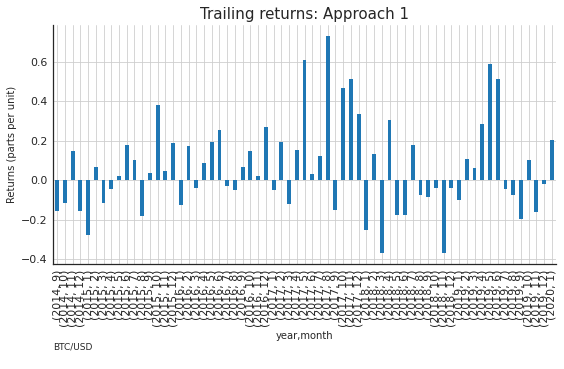

In [49]:
# ploting
# -------
plot_this(approach1, bar=True, title='Trailing returns: Approach 1',
          ylabel='Returns (parts per unit)', txt_ymin=-0.4, bottom_adj=0.25,
          output_file='imgs/fig_rets_approach1.png');

In [50]:
select_idx = (2017, 7)
idx_approach1 = results_storage.groupby(['year', 'month'])['close'].groups[select_idx]
last_group = results_storage.loc[idx_approach1]
last_group.head()
last_group.tail()

,close,year,month,day,week_day,week_day_name
Date,,,,,,
2017-07-25,2576.479980,2017,7,25,1,Tuesday
2017-07-26,2529.449951,2017,7,26,2,Wednesday
2017-07-27,2671.780029,2017,7,27,3,Thursday
2017-07-28,2809.010010,2017,7,28,4,Friday
2017-07-31,2875.340088,2017,7,31,0,Monday


In [51]:
# example of the calculation
total_return(last_group.close), approach1.loc[select_idx]

(0.12140122377687246, 0.12140122377687246)

##Approach 2: starting from daily returns

In [0]:
def total_return_from_returns(returns):
    """Retuns the return between the first and last value of the DataFrame.

    Parameters
    ----------
    returns : pandas.Series or pandas.DataFrame

    Returns
    -------
    total_return : float or pandas.Series
        Depending on the input passed returns a float or a pandas.Series.
    """
    return (returns + 1).prod() - 1

In [0]:
r = prices.pct_change()
approach2 = r.groupby((r.index.year, r.index.month))\
             .apply(total_return_from_returns)

approach2.tail(12)

In [0]:
plot_this(approach2, bar=True, title='Trailing returns: Approach 2',
          ylabel='Returns (parts per unit)', txt_ymin=-0.4, bottom_adj=0.25,
          output_file='imgs/fig_rets_approach2.png')

##Approach 3: ผลตอบแทนสิ้นเดือน

In [0]:
# with "asfreq" we decimate the prices, then group by year and month, so we
# have all the prices at the end of the working month available in the DataFrame.
# Finally we calculate the return of this new series with "pct_change".
approach3 = results_storage.asfreq('BM')\
                           .set_index(['year', 'month'])\
                           .close\
                           .pct_change()
approach3.tail(12)

In [0]:
plot_this(approach3, bar=True, title='Trailing returns: Approach 3',
          ylabel='Returns (parts per unit)', txt_ymin=-0.4, bottom_adj=0.25,
          output_file='imgs/fig_rets_approach3.png')

##เปรียบเทียบ

In [0]:
all_approaches = pd.concat([approach1, approach2, approach3], axis=1,
                           keys=['approach1', 'approach2', 'approach3'])

In [0]:
all_approaches.head(12)

In [0]:
plot_this(all_approaches, title='Comparing all approaches',
          output_file='imgs/all_approaches.png', bar=True,
          ylabel='Returns (parts per unit)', bottom_adj=0.25, figsize=(15,6),
          txt_ymin=-0.4)